#X = df[["V1","V2","V3","I1","I2","I3","Pges","Sges","CosPhi"]]
r = X.rolling(60).mean()
data_smooth = pd.DataFrame(r.iloc[59:,:])
data_smooth.shape
data_1 = np.random.randn(10000)
plt.hist(data_1)
data = data_1 + (0.5 * np.random.randn(10000))
plt.hist(data)

import numpy as np
noise = np.random.normal(0,1,100)
# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise


main_signal = np.random.normal(0.5,5,10000) +  np.random.normal(1.5,15,10000)
main_signal.shape
plt.hist(main_signal)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(main_signal)
plt.hist(X_std)

clf = GaussianMixture(1,covariance_type='full').fit(X_std)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

import itertools
from scipy import linalg
import matplotlib as mpl

  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

 



In [ ]:
data = loadmat('data/ex8data1.mat')  

In [3]:
X = data['X']  
X.shape 

(307, 2)

In [ ]:
X[:,0]

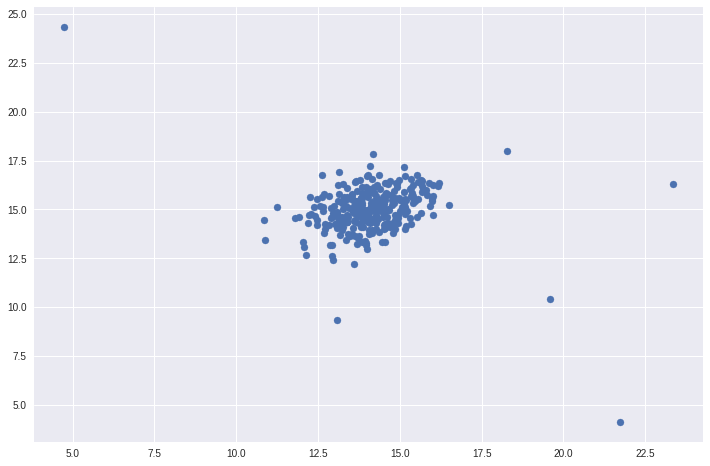

In [4]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1])  

In [7]:
def estimate_gaussian(X):  
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)

    return mu, sigma

In [8]:
mu, sigma = estimate_gaussian(X)  
mu, sigma

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

# Load the validation data

In [10]:
Xval = data['Xval']  
yval = data['yval']

Xval.shape, yval.shape 

((307, 2), (307, 1))

In [11]:
from scipy import stats  
dist = stats.norm(mu[0], sigma[0])  
dist.pdf(X[:,0])[0:50]

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

In [12]:
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape

(307, 2)

In [13]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])  


In [14]:
def select_threshold(pval, yval):  
    best_epsilon = 0
    best_f1 = 0
    f1 = 0

    step = (pval.max() - pval.min()) / 1000

    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)  
epsilon, f1  


/home/arun/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


(0.0095667060059568421, 0.7142857142857143)

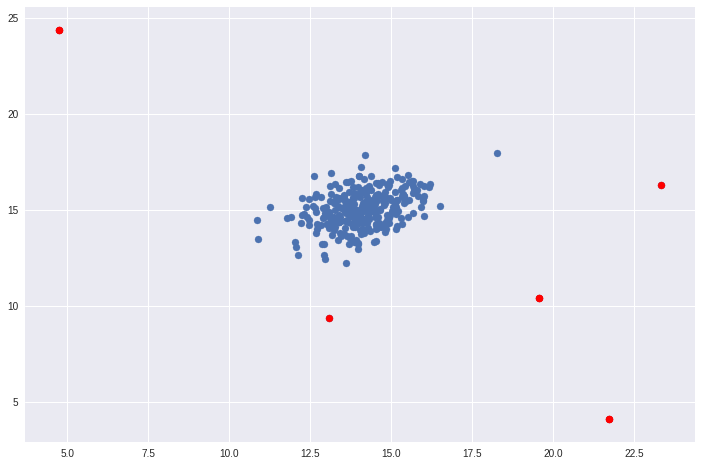

In [15]:
outliers = np.where(p < epsilon)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1])  
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')  
